In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

In [3]:
plt.style.use('ggplot')

In [4]:
df = pd.read_excel('./data/map_sample.xlsx', index_col="id")

In [5]:
df.head()

,value
id,
1,3.896195
2,5.865766
3,5.860887
4,4.660614
5,5.263595


(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <a list of 10 Patch objects>)

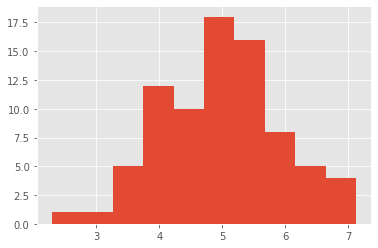

In [6]:
plt.hist(df["value"])

In [17]:
def likelihood(mu, *args):
    """ 負の対数尤度関数の値を返す関数 """
    # locは平均を意味する
    # locに配列を渡すと，各要素を平均としたPDFのmu点の値のリストを返す
    # なお，分散scaleはデフォルトで1
    li = -np.log10(stats.norm.pdf(mu, loc=args))
    return np.sum(np.sum(li))

In [18]:
optimize.minimize(likelihood, 1, args=df["value"])

      fun: 47.65549318887928
 hess_inv: array([[0.02878231]])
      jac: array([9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.97609903])

これより，データを生成した正規分布の平均パラメータの値は約4.98であったのではないか，という点推定ができる．    

これは，正確に事後分布全体を求めるよりも高速である．